In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import scipy.cluster.hierarchy as shc

In [7]:
c_df = pd.read_csv("./../Assignment5/Country-data.csv")
c_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [9]:
new_df = c_df.drop("country", axis=1)

In [5]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

data = scaler.fit_transform(new_df)
data = pd.DataFrame(data, columns=new_df.columns)
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


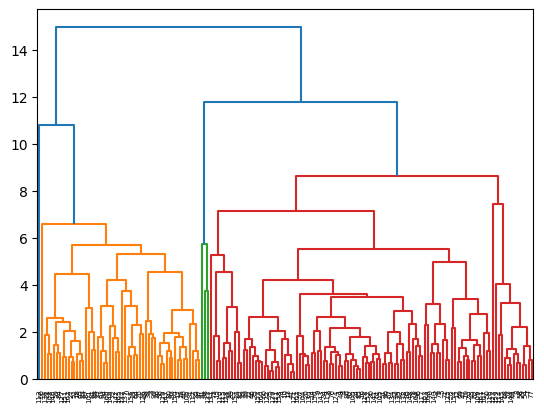

In [24]:
temp = shc.linkage(data, 'complete')
dend = shc.dendrogram(temp)

cluster_labels = shc.cut_tree(temp, n_clusters=4)
cluster_labels.flatten();
df = data.copy()

I don't fully understand why PCA is used but I just know its used to reduce the number of features


Trying to do understand association rule mining

In [28]:
from mlxtend.frequent_patterns import apriori, association_rules

In [29]:
g_df = pd.read_csv("./../Assignment5/Groceries data.csv")
g_df.head()

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4


In [30]:
g_df.shape

(38765, 7)

In [40]:
g_df["item count"] = 1

df = g_df.drop(["month", "day", "day_of_week", "year"], axis=1)
df = g_df.pivot_table(index="Member_number", columns="itemDescription", values="item count", fill_value=0)
df.head()
df.astype(bool)

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1001,False,False,False,False,False,False,False,False,True,False,...,False,False,False,True,False,True,False,True,False,False
1002,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1003,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1004,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
4998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [42]:
min_support = 0.07
freq_item_set = apriori(df, min_support=min_support, use_colnames=True)

/home/emonueje/Documents/tech_ml_ai/ml_edureka/env/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [44]:
rules = association_rules(freq_item_set, metric='lift')

Getting the association rules with lift >= 1 and confidence >= 0.5

In [46]:
rules_filtered = rules[(rules.lift > 1) & (rules.confidence >= 0.5)]
rules_filtered.shape

(15, 10)